In [79]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [80]:
# ニューラルネットワークの定義
class neuralNetwork:
    
    # 初期化
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 入力層、隠れ層、出力層のノード数の設定
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # リンクの重み行列 wih と who
        # 行列内の重み w_i_j, ノード i から次の層のノード j へのリンクの重み
        self.wih = numpy.random.normal(0.0,pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 学習率の設定
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 学習
    def train(self, inputs_list, targets_list):
            
            # 入力リストを行列に変換
            inputs = numpy.array(inputs_list, ndmin=2).T
            targets = numpy.array(targets_list, ndmin=2).T
            
            # 隠れ層に入ってくる信号の計算
            hidden_inputs = numpy.dot(self.wih, inputs)
            # 隠れ層で結合された信号を活性化関数により出力
            hidden_outputs = self.activation_function(hidden_inputs)
            
            # 出力層に入ってくる信号の計算
            final_inputs = numpy.dot(self.who, hidden_outputs)
            # 出力層で結合された信号を活性化関数により出力
            final_outputs = self.activation_function(final_inputs)
            
            # 出力の誤差 = (目標出力 - 最終出力)
            output_errors = targets - final_outputs
            
            # 隠れ層の誤差は出力層の誤差をリンクの重みの割合で分配
            hidden_errors = numpy.dot(self.who.T, output_errors)
            
            self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
            self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
            
            pass
        
    # 照会
    def query(self, inputs_list):
        # 入力リストを行列に変換
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 隠れ層に入ってくる信号の計算
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 出力層に入ってくる信号の計算
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

# 入力層、隠れ層、出力層のノード数
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 学習率 = 0.3
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 訓練データの全データに対して実行
for record in training_data_list:
    # データをコンマ','でsplit
    all_values = record.split(',')
    # 入力値のスケーリングとシフト
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 目標配列の生成(ラベルの位置が 0.99 残りは 0.01)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0]はこのデータのラベル
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [81]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [82]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


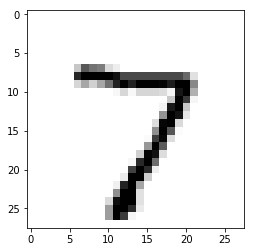

In [73]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [74]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[  6.61438540e-03],
       [  1.01311289e-02],
       [  1.87092740e-02],
       [  1.03748163e-02],
       [  7.33230149e-04],
       [  3.50451992e-03],
       [  2.99658712e-03],
       [  9.42028137e-01],
       [  5.41543597e-03],
       [  2.27112300e-03]])

In [75]:
# ニューラルネットワークのテスト

# scorecardは判定のリスト、最初は空
scorecard = []

# テストデータのすべてのデータに対して実行
for record in test_data_list:
    # データをコンマ','でsplit
    all_values = record.split(',')
    # 正解は配列の一番目
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # ネットワークへの照会
    outputs = n.query(inputs)
    # 最大値のインデックスがラベルに対応
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # 正解(1), 間違い(0) をリストに追加
    if (label == correct_label):
        scorecard.append(1)
    else:
        # 間違いなら0 を追加
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

1 correct label
1 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
9 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 ne

8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
4 correct label
4 ne

3 correct label
3 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 ne

8 network's answer
0 correct label
0 network's answer
4 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9

5 network's answer
0 correct label
4 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
2 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
7

3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
8 correct label
1 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
0 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
3 correct label
8 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
3

3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
2 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
2 correct label
2 ne

2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
3 correct label
6 network's answer
4 correct label
9 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
3 ne

7 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
5 correct label
3 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
2 correct label
0 network's answer
7 correct label
7 network's answer
3

5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
4 correct label
4 ne

5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
6 correct label
5 network's answer
7 correct label
7 ne

8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
6 correct label
5 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
9 correct label
9 ne

9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
4 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 ne

2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
7 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
2 ne

1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
6 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 ne

1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
9 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
8 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 ne

8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
7 correct label
9 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
0

2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
1 correct label
1 ne

0 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7

1 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6

7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7

0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
5 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 ne

1 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
3 correct label
2 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
0

2 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
2 correct label
8 network's answer
4 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
6 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
5 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 ne

3 network's answer
8 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
6 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9

6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 ne

3 network's answer
4 correct label
4 network's answer
7 correct label
2 network's answer
2 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
2 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
7

5 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1

6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
6 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
5

In [76]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [77]:
# 評価値(正解の割合)の計算
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9481
